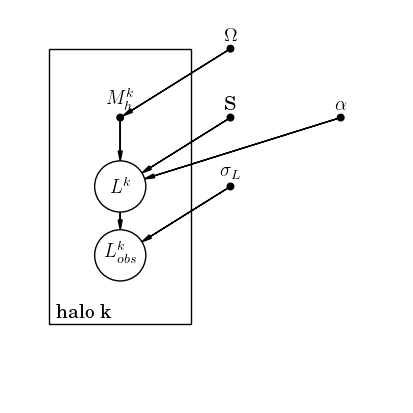

In [1]:
%matplotlib inline

from matplotlib import rc
rc("font", family="serif", size=14)
rc("text", usetex=True)

import daft

pgm = daft.PGM([5, 5], origin=[0, 0])

#dimensions
plate_x = 0.5
plate_y = 1
plate_width = 1.8
plate_height = 3.5
plate_x_center = plate_x + (plate_width / 2.0)
plate_y_fourth = plate_height / 4.0
scale = 1.3

#plate
pgm.add_plate(daft.Plate([plate_x, plate_y, plate_width, plate_height], label="halo k"))

#nodes
pgm.add_node(daft.Node("m_h", "$M_h^k$", plate_x_center, plate_y + 3 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("l", "$L^k$", plate_x_center, plate_y + 2 * plate_y_fourth, scale=scale))
pgm.add_node(daft.Node("l_obs", "$L^k_{obs}$", plate_x_center, plate_y + 1 * plate_y_fourth, scale=scale))

pgm.add_node(daft.Node("sigma_l", "$\sigma_L$", 2*plate_x_center, plate_y + 2 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("s", "S", 2*plate_x_center, plate_y + 3 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("alpha", r"$\alpha$", 3*plate_x_center, plate_y + 3 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("omega", r"$\Omega$", 2*plate_x_center, plate_y + 4 * plate_y_fourth, fixed=True))

#edges
pgm.add_edge("m_h", "l")
pgm.add_edge("l", "l_obs")
pgm.add_edge("sigma_l", "l_obs")
pgm.add_edge("s", "l")
pgm.add_edge("alpha", "l")
pgm.add_edge("omega", "m_h")

pgm.render()

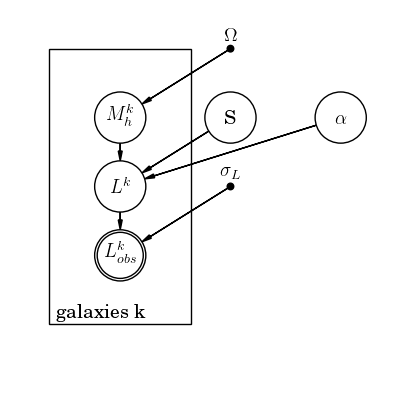

In [61]:
pgm = daft.PGM([5, 5], origin=[0, 0], observed_style="inner")

#dimensions
plate_x = 0.5
plate_y = 1
plate_width = 1.8
plate_height = 3.5
plate_x_center = plate_x + (plate_width / 2.0)
plate_y_fourth = plate_height / 4.0
scale = 1.3

#plate
pgm.add_plate(daft.Plate([plate_x, plate_y, plate_width, plate_height], label="galaxies k"))

#nodes
pgm.add_node(daft.Node("m_h", "$M_h^k$", plate_x_center, plate_y + 3 * plate_y_fourth, scale=scale))
pgm.add_node(daft.Node("l", "$L^k$", plate_x_center, plate_y + 2 * plate_y_fourth, scale=scale))
pgm.add_node(daft.Node("l_obs", "$L^k_{obs}$", plate_x_center, plate_y + 1 * plate_y_fourth, scale=scale, observed=True))

pgm.add_node(daft.Node("sigma_l", "$\sigma_L$", 2*plate_x_center, plate_y + 2 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("s", "S", 2*plate_x_center, plate_y + 3 * plate_y_fourth, scale=scale))
pgm.add_node(daft.Node("alpha", r"$\alpha$", 3*plate_x_center, plate_y + 3 * plate_y_fourth, scale=scale))
pgm.add_node(daft.Node("omega", r"$\Omega$", 2*plate_x_center, plate_y + 4 * plate_y_fourth, fixed=True))

#edges
pgm.add_edge("m_h", "l")
pgm.add_edge("l", "l_obs")
pgm.add_edge("sigma_l", "l_obs")
pgm.add_edge("s", "l")
pgm.add_edge("alpha", "l")
pgm.add_edge("omega", "m_h")

pgm.render()

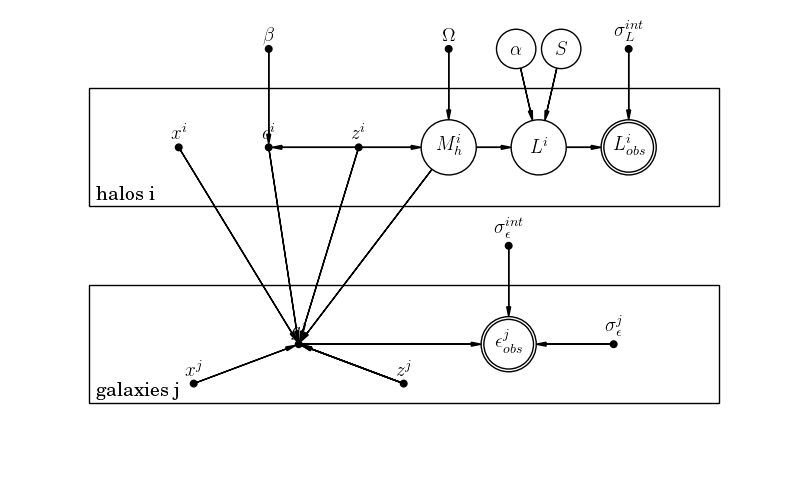

In [124]:
from daft import PGM, Plate, Node

#dimensions
pgm_height = 6.
pgm_width = 10.
border = 1.0
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 3. * border) / 2.
plate_1_x = border
plate_1_y = border
plate_2_x = border
plate_2_y = plate_height + 2. * border
plate_1_mid = plate_height / 2. + plate_1_y
plate_2_mid = plate_height / 2. + plate_2_y
seventh = plate_width / 7.
sixth = plate_width / 6.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")

#plate
pgm.add_plate(Plate([plate_1_x, plate_1_y, plate_width, plate_height], label="galaxies j"))
pgm.add_plate(Plate([plate_2_x, plate_2_y, plate_width, plate_height], label="halos i"))


#nodes
pgm.add_node(Node('x_j', '$x^j$', plate_1_x + sixth, plate_1_mid-border/2., fixed=True))
pgm.add_node(Node('g_j', '$g^j$', plate_1_x + 2. * sixth, plate_1_mid, fixed=True))
pgm.add_node(Node('z_j', '$z^j$', plate_1_x + 3. * sixth, plate_1_mid-border/2., fixed=True))
pgm.add_node(Node('e_obs_j', '$\epsilon_{obs}^j$', plate_1_x + 4. * sixth, plate_1_mid, scale=scale, observed=True))
pgm.add_node(Node('e_sig_obs_j', r'$\sigma_{\epsilon}^j$', plate_1_x + 5. * sixth, plate_1_mid, fixed=True))

pgm.add_node(Node('x_i', '$x^i$', plate_2_x + seventh, plate_2_mid, fixed=True))
pgm.add_node(Node('c_i', '$c^i$', plate_2_x + 2. * seventh, plate_2_mid, fixed=True))
pgm.add_node(Node('z_i', '$z^i$', plate_2_x + 3. * seventh, plate_2_mid, fixed=True))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_2_x + 4. * seventh, plate_2_mid, scale=scale))
pgm.add_node(Node('L_i', '$L^i$', plate_2_x + 5. * seventh, plate_2_mid, scale=scale))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_2_x + 6. * seventh, plate_2_mid, scale=scale, observed=True))

pgm.add_node(Node('e_sig_int', '$\sigma_{\epsilon}^{int}$', plate_1_x + 4. * sixth, pgm_height / 2., fixed=True))

pgm.add_node(Node('beta', r'$\beta$', plate_2_x + 2. * seventh, pgm_height - (border/2.), fixed=True))
pgm.add_node(Node('omega', r'$\Omega$', plate_2_x + 4. * seventh, pgm_height - (border/2.), fixed=True))
pgm.add_node(Node('alpha', r'$\alpha$', plate_2_x + 5. * seventh - (seventh/4.), pgm_height - (border/2.), scale=smallscale))
pgm.add_node(Node('s', r'$S$', plate_2_x + 5. * seventh + (seventh/4.), pgm_height - (border/2.), scale=smallscale))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}^{int}$', plate_2_x + 6. * seventh, pgm_height - (border/2.), fixed=True))

# #edges
pgm.add_edge('beta', 'c_i')
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'c_i')
pgm.add_edge('z_i', 'M_h_i')

pgm.add_edge('x_i', 'g_j')
pgm.add_edge('z_i', 'g_j')
pgm.add_edge('c_i', 'g_j')
pgm.add_edge('M_h_i', 'g_j')

pgm.add_edge('x_j', 'g_j')
pgm.add_edge('z_j', 'g_j')
pgm.add_edge('z_j', 'g_j')
pgm.add_edge('z_j', 'g_j')
pgm.add_edge('g_j', 'e_obs_j')
pgm.add_edge('e_sig_int', 'e_obs_j')
pgm.add_edge('e_sig_obs_j', 'e_obs_j')

pgm.render()

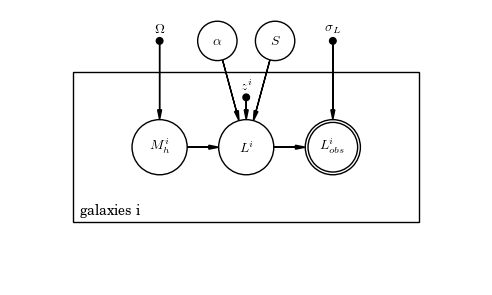

In [25]:
%matplotlib inline

from daft import PGM, Plate, Node
import matplotlib.pyplot as plt

#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

color = '#00bfff'
blue = {}

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="galaxies i"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
# plt.title('Simplified Model', fontsize=18)

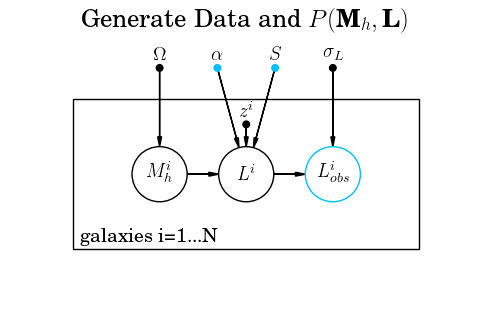

In [2]:
%matplotlib inline

from daft import PGM, Plate, Node
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family="serif", size=14)
rc("text", usetex=True)

#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

color = '#00bfff'
blue = {'fc': color, 'ec': color}

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue, fixed=True))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue, fixed=True))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title(r'Generate Data and $P(\textbf{M}_h,\textbf{L})$', fontsize=18)

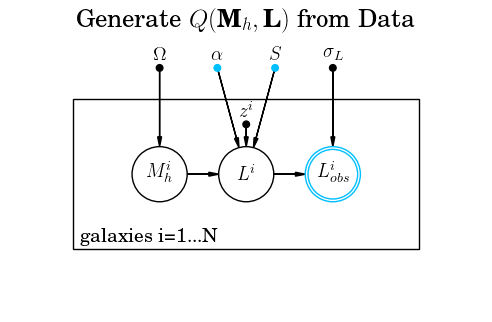

In [1]:
%matplotlib inline

from daft import PGM, Plate, Node
import matplotlib.pyplot as plt

from matplotlib import rc
rc("font", family="serif", size=14)
rc("text", usetex=True)

#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

color = '#00bfff'
blue = {'fc': color, 'ec': color}

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, plot_params={'ec': color}, observed=True))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue, fixed=True))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue, fixed=True))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title(r'Generate $Q(\textbf{M}_h,\textbf{L})$ from Data', fontsize=18)

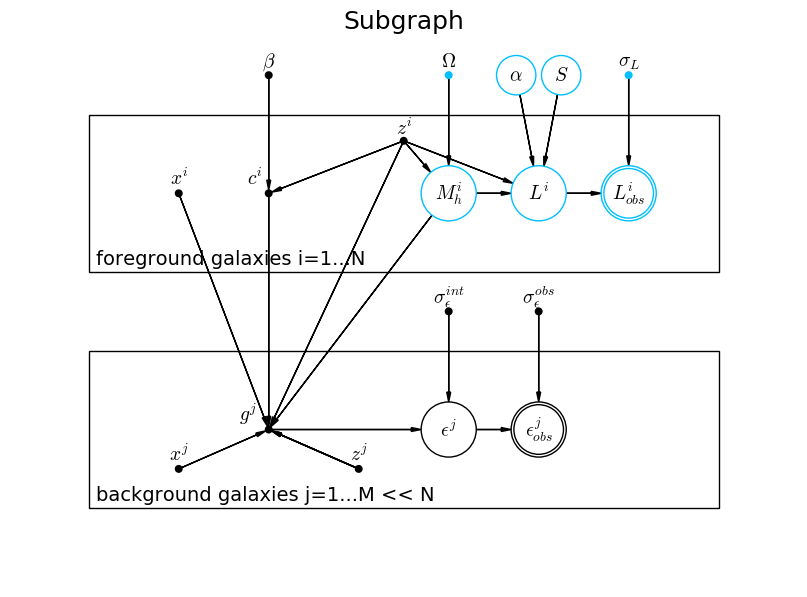

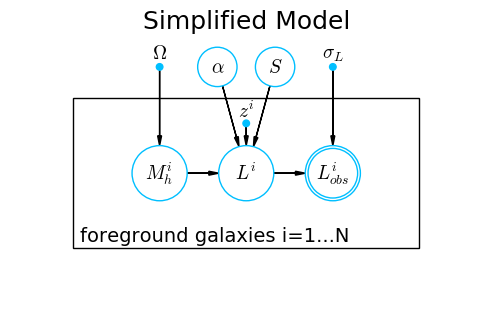

In [1]:
%matplotlib inline

from daft import PGM, Plate, Node
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['font.size'] = 14

#dimensions
pgm_height = 7.
pgm_width = 10.
border = 1.0
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 3. * border) / 2.
plate_1_x = border
plate_1_y = border
plate_2_x = border
plate_2_y = plate_height + 2. * border
plate_1_mid = plate_height / 2. + plate_1_y
plate_2_mid = plate_height / 2. + plate_2_y
seventh = plate_width / 7.

color = '#00bfff'
blue = {'fc': color, 'ec': color}

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")

#plate
pgm.add_plate(Plate([plate_1_x, plate_1_y, plate_width, plate_height], label="background galaxies j=1...M << N"))
pgm.add_plate(Plate([plate_2_x, plate_2_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

#nodes
pgm.add_node(Node('x_j', '$x^j$', plate_1_x + seventh, plate_1_mid-border/2., fixed=True))
pgm.add_node(Node('g_j', '$g^j$', plate_1_x + 2. * seventh, plate_1_mid, fixed=True, offset=(-15,0)))
pgm.add_node(Node('z_j', '$z^j$', plate_1_x + 3. * seventh, plate_1_mid-border/2., fixed=True))
pgm.add_node(Node('e_j', '$\epsilon^j$', plate_1_x + 4. * seventh, plate_1_mid, scale=scale))
pgm.add_node(Node('e_obs_j', '$\epsilon_{obs}^j$', plate_1_x + 5. * seventh, plate_1_mid, scale=scale, observed=True))

pgm.add_node(Node('x_i', '$x^i$', plate_2_x + seventh, plate_2_mid, fixed=True))
pgm.add_node(Node('c_i', '$c^i$', plate_2_x + 2. * seventh, plate_2_mid, fixed=True, offset=(-10,0)))
pgm.add_node(Node('z_i', '$z^i$', plate_2_x + 3.5 * seventh, plate_2_mid + plate_height / 3, fixed=True, offset=(0,-2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_2_x + 4. * seventh, plate_2_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_i', '$L^i$', plate_2_x + 5. * seventh, plate_2_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_2_x + 6. * seventh, plate_2_mid, scale=scale, observed=True, plot_params={'ec': color}))

pgm.add_node(Node('e_sig_obs', r'$\sigma_{\epsilon}^{obs}$', plate_1_x + 5. * seventh, pgm_height / 2., fixed=True))
pgm.add_node(Node('e_sig_int', '$\sigma_{\epsilon}^{int}$', plate_1_x + 4. * seventh, pgm_height / 2., fixed=True))

pgm.add_node(Node('beta', r'$\beta$', plate_2_x + 2. * seventh, pgm_height - (border/2.), fixed=True))
pgm.add_node(Node('omega', r'$\Omega$', plate_2_x + 4. * seventh, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha$', plate_2_x + 5. * seventh - (seventh/4.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('s', r'$S$', plate_2_x + 5. * seventh + (seventh/4.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_2_x + 6. * seventh, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('beta', 'c_i')
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'c_i')
pgm.add_edge('z_i', 'M_h_i')
pgm.add_edge('z_i', 'L_i')

pgm.add_edge('x_i', 'g_j')
pgm.add_edge('z_i', 'g_j')
pgm.add_edge('c_i', 'g_j')
pgm.add_edge('M_h_i', 'g_j')

pgm.add_edge('x_j', 'g_j')
pgm.add_edge('z_j', 'g_j')
pgm.add_edge('z_j', 'g_j')
pgm.add_edge('z_j', 'g_j')
pgm.add_edge('g_j', 'e_j')
pgm.add_edge('e_j', 'e_obs_j')
pgm.add_edge('e_sig_int', 'e_j')
pgm.add_edge('e_sig_obs', 'e_obs_j')

pgm.render()
plt.title('Subgraph', fontsize=18)

#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue, offset=(0, -2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True, plot_params={'ec': color}))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title('Simplified Model', fontsize=18)

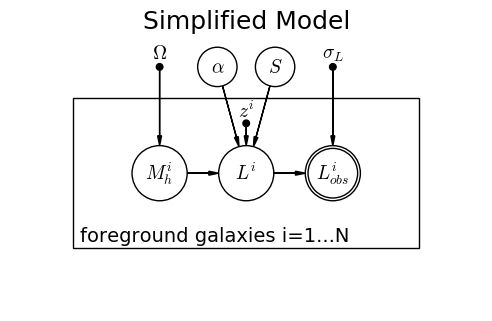

In [3]:
#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")
blue={}

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue, offset=(0, -2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title('Simplified Model', fontsize=18)

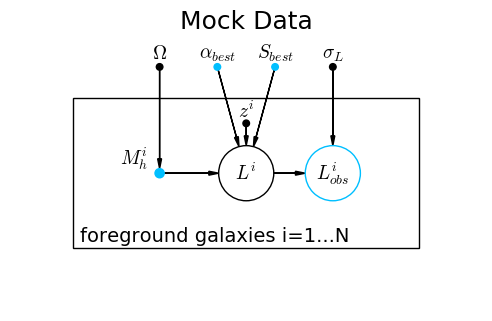

In [14]:
#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")
blue={}

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue, offset=(0, -2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params={'ec':color, 'fc':color}, fixed=True, offset=(-18,0)))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=False, plot_params={'ec':color}))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha_{best}$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, fixed=True, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('s', r'$S_{best}$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, fixed=True, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title('Mock Data', fontsize=18)

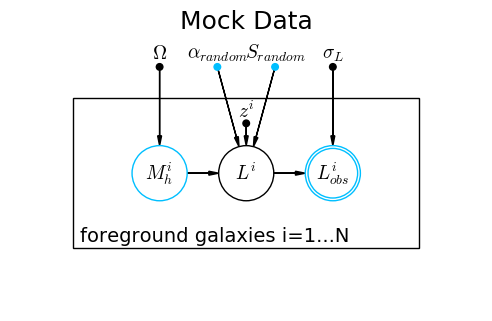

In [20]:
#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")
blue={}

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue, offset=(0, -2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True, plot_params={ 'ec':color}))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha_{random}$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, fixed=True, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('s', r'$S_{random}$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, fixed=True, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title('Mock Data', fontsize=18)

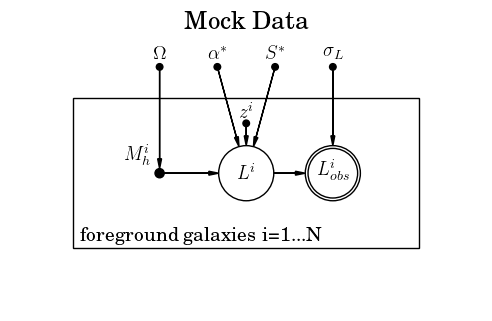

In [10]:
%matplotlib inline

from daft import PGM, Plate, Node
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['font.size'] = 14

#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")
color = 'black'
blue={}

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue, offset=(0, -2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params={'ec':color, 'fc':color}, fixed=True, offset=(-16,0)))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True, plot_params={ 'ec':color}))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha^*$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, fixed=True, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('s', r'$S^*$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, fixed=True, plot_params={'ec':color, 'fc':color}))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title('Mock Data', fontsize=18)

In [ ]:
#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")
blue={}

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="foreground galaxies i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.0, fixed=True, plot_params=blue, offset=(0, -2)))
pgm.add_node(Node('M_h_i', '$M_h^i$', plate_x + 1. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale, plot_params=blue))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True))
pgm.add_node(Node('omega', r'$\Omega$', plate_x + 1. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale, plot_params=blue))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True, plot_params=blue))

# #edges
pgm.add_edge('omega', 'M_h_i')
pgm.add_edge('M_h_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
plt.title('Simplified Model', fontsize=18)

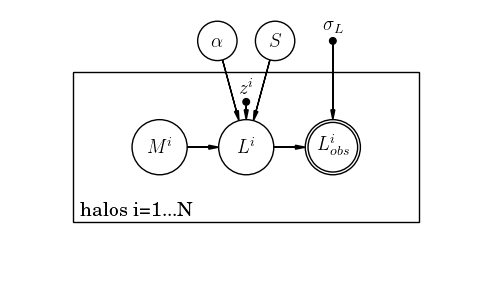

In [15]:
from daft import *
import matplotlib.pyplot as plt

#dimensions
pgm_height = 3.5
pgm_width = 6.
border = 0.8
scale = 1.4
smallscale=1.0
plate_width = pgm_width - 2. * border
plate_height = (pgm_height - 2. * border)
plate_x = border
plate_y = border
plate_mid = plate_height / 2. + plate_y
fourth = plate_width / 4.

pgm = PGM([pgm_width, pgm_height], origin=[0, 0], observed_style="inner")
blue={}

#plate
pgm.add_plate(Plate([plate_x, plate_y, plate_width, plate_height], label="halos i=1...N"))

pgm.add_node(Node('z_i', '$z^i$', plate_x + 2. * fourth, plate_mid + plate_height / 3.3, fixed=True))
pgm.add_node(Node('M_i', '$M^i$', plate_x + 1. * fourth, plate_mid, scale=scale))
pgm.add_node(Node('L_i', '$L^i$', plate_x + 2. * fourth, plate_mid, scale=scale))
pgm.add_node(Node('L_obs_i', '$L_{obs}^i$', plate_x + 3. * fourth, plate_mid, scale=scale, observed=True))
pgm.add_node(Node('alpha', r'$\alpha$', plate_x + 2. * fourth - (fourth/3.), pgm_height - (border/2.), scale=smallscale))
pgm.add_node(Node('s', r'$S$', plate_x + 2. * fourth + (fourth/3.), pgm_height - (border/2.), scale=smallscale))
pgm.add_node(Node('L_sig_int', r'$\sigma_{L}$', plate_x + 3. * fourth, pgm_height - (border/2.), fixed=True))

# #edges
pgm.add_edge('M_i', 'L_i')
pgm.add_edge('L_i', 'L_obs_i')
pgm.add_edge('alpha', 'L_i')
pgm.add_edge('s', 'L_i')
pgm.add_edge('L_sig_int', 'L_obs_i')
pgm.add_edge('z_i', 'L_i')
pgm.render()
# plt.title('Mock Data', fontsize=18)